<a href="https://colab.research.google.com/github/minhazuddin/ann/blob/main/Cancer_classification_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cancer Classification

### Model without Dropout function




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/cancer_classification.csv')

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

<Axes: xlabel='benign_0__mal_1', ylabel='count'>

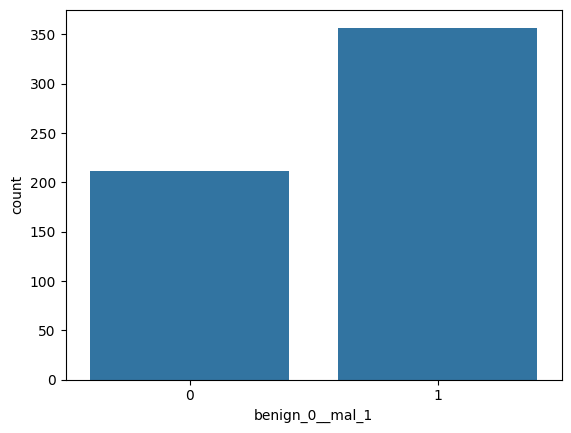

In [ ]:
sns.countplot(data=df, x='benign_0__mal_1')

In [ ]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
X_train.shape

(426, 30)

In [ ]:
X_test.shape

(143, 30)

In [ ]:
X_train.max()

4254.0

In [ ]:
X_train.min()

0.0

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
scaled_X_train.max()

1.0

In [ ]:
scaled_X_train.min()

0.0

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Dense(30, activation='relu'),
                             tf.keras.layers.Dense(15, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
                             ])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [ ]:
model.fit(scaled_X_train, y_train, epochs=600, validation_data=(scaled_X_test, y_test), verbose=1)

Epoch 1/600
14/14 [==============================] - 1s 24ms/step - loss: 0.6305 - accuracy: 0.7723 - val_loss: 0.6028 - val_accuracy: 0.8392
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5833 - accuracy: 0.8239 - val_loss: 0.5581 - val_accuracy: 0.8601
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5404 - accuracy: 0.8333 - val_loss: 0.5153 - val_accuracy: 0.8811
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4974 - accuracy: 0.8474 - val_loss: 0.4683 - val_accuracy: 0.8881
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4522 - accuracy: 0.8732 - val_loss: 0.4232 - val_accuracy: 0.8881
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4091 - accuracy: 0.8779 - val_loss: 0.3797 - val_accuracy: 0.9021
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3719 - accuracy: 0.8779 - val_loss: 0.3399 - val_accuracy: 0.9021
Epoch 8/600


In [ ]:
model_loss = pd.DataFrame(model.history.history)

In [ ]:
model_loss[['loss', 'val_loss']]

,loss,val_loss
0,0.630538,0.602816
1,0.583303,0.558110
2,0.540364,0.515257
3,0.497376,0.468277
4,0.452189,0.423175
...,...,...
595,0.004250,0.316008
596,0.004593,0.318700
597,0.003731,0.327448
598,0.006657,0.307473


<Axes: >

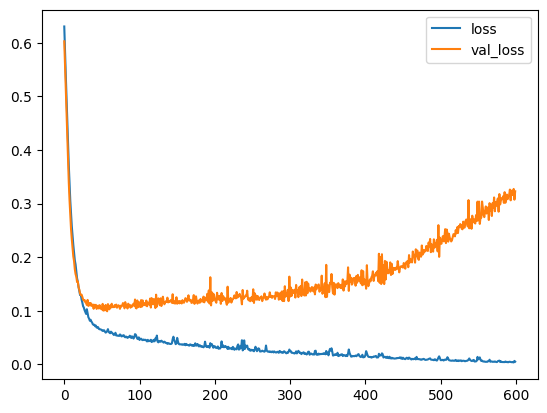

In [ ]:
model_loss[['loss', 'val_loss']].plot()

### Model with Early Stopping


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25)

In [ ]:
model_1 = tf.keras.Sequential([tf.keras.layers.Dense(30, activation='relu'),
                             tf.keras.layers.Dense(15, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
                             ])

In [ ]:
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [ ]:
model_1.fit(scaled_X_train, y_train, epochs=600, validation_data=(scaled_X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 26ms/step - loss: 0.6794 - accuracy: 0.4906 - val_loss: 0.6555 - val_accuracy: 0.6853
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6409 - accuracy: 0.7840 - val_loss: 0.6242 - val_accuracy: 0.8601
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6106 - accuracy: 0.8685 - val_loss: 0.5955 - val_accuracy: 0.8811
Epoch 4/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5805 - accuracy: 0.8779 - val_loss: 0.5640 - val_accuracy: 0.8951
Epoch 5/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5476 - accuracy: 0.8967 - val_loss: 0.5307 - val_accuracy: 0.8951
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5143 - accuracy: 0.8944 - val_loss: 0.4949 - val_accuracy: 0.8951
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4788 - accuracy: 0.8897 - val_loss: 0.4598 - val_accuracy: 0.9021
Epoch 8/600


In [ ]:
model_1_losses = pd.DataFrame(model_1.history.history)

<Axes: >

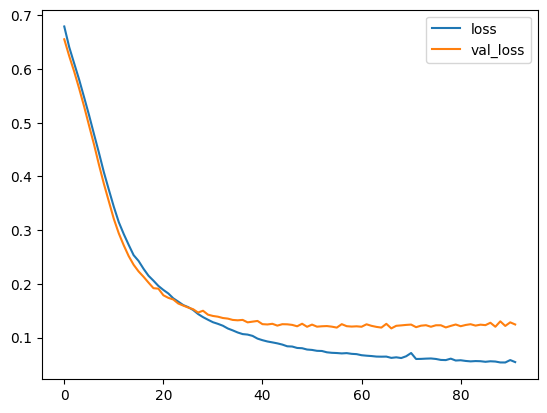

In [ ]:
model_1_losses[['loss', 'val_loss']].plot()

### Model with Dropout layer

In [ ]:
model_2 = tf.keras.Sequential([tf.keras.layers.Dense(30, activation='relu'),
                               tf.keras.layers.Dropout(0.5),
                               tf.keras.layers.Dense(15, activation='relu'),
                               tf.keras.layers.Dropout(0.5),
                               tf.keras.layers.Dense(1, activation='sigmoid')
                               ])

In [ ]:
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25)

In [ ]:
model_2.fit(scaled_X_train, y_train, epochs=600, validation_data=(scaled_X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 19ms/step - loss: 0.7234 - accuracy: 0.4977 - val_loss: 0.6833 - val_accuracy: 0.4545
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6856 - accuracy: 0.5399 - val_loss: 0.6699 - val_accuracy: 0.5734
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6730 - accuracy: 0.5939 - val_loss: 0.6553 - val_accuracy: 0.8182
Epoch 4/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6566 - accuracy: 0.6408 - val_loss: 0.6378 - val_accuracy: 0.8671
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6341 - accuracy: 0.7207 - val_loss: 0.6133 - val_accuracy: 0.8811
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6177 - accuracy: 0.7418 - val_loss: 0.5847 - val_accuracy: 0.9021
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5804 - accuracy: 0.7394 - val_loss: 0.5460 - val_accuracy: 0.9161
Epoch 8/600


In [ ]:
model_2_losses = pd.DataFrame(model_2.history.history)

<Axes: >

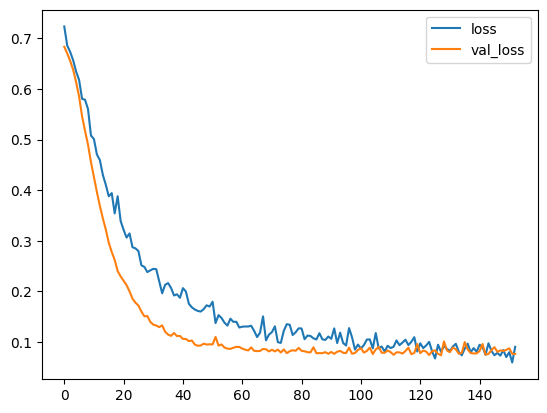

In [ ]:
model_2_losses[['loss', 'val_loss']].plot()